In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install seaborn
import seaborn as sns 

In [2]:
df = pd.read_csv("inc_occ_gender.csv")
print(df.shape)
df.head()

(558, 7)


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


In [3]:
df.describe(include="all")

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,558,558.000000,558,558.000000,558,558.000000,558
unique,558,NaN,277,NaN,212,NaN,183
top,"Model makers and patternmakers, wood",NaN,Na,NaN,Na,NaN,Na
freq,1,NaN,236,NaN,326,NaN,366
mean,NaN,586.458781,NaN,326.593190,NaN,259.831541,NaN
std,NaN,4758.979138,NaN,2654.600532,NaN,2142.551053,NaN
min,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,21.000000,NaN,11.000000,NaN,3.000000,NaN
50%,NaN,67.000000,NaN,33.500000,NaN,18.000000,NaN
75%,NaN,253.000000,NaN,121.750000,NaN,84.000000,NaN


In [4]:
df.dtypes

Occupation     object
All_workers     int64
All_weekly     object
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object

In [5]:
df.drop(df[df['Occupation'] == 'ALL OCCUPATIONS'].index, axis=0, inplace=True)
df.replace(to_replace="Na", value=np.nan, inplace=True)
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,NaN,5,NaN,4,NaN
5,Advertising and promotions managers,55,1050,29,NaN,26,NaN


In [6]:
df["All_weekly"] = df["All_weekly"].astype("float")
df["M_weekly"] = df["M_weekly"].astype("float")
df["F_weekly"] = df["F_weekly"].astype("float")
df.dtypes

Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [7]:
mean_all = df["All_weekly"].mean()
df["All_weekly"].replace(to_replace=np.nan, value=mean_all, inplace=True)

mean_m = df["M_weekly"].mean()
df["M_weekly"].replace(to_replace=np.nan, value=mean_m, inplace=True)

mean_f = df["F_weekly"].mean()
df["F_weekly"].replace(to_replace=np.nan, value=mean_f, inplace=True)

df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
1,MANAGEMENT,12480,1351.000000,7332,1486.000000,5147,1139.000000
2,Chief executives,1046,2041.000000,763,2251.000000,283,1836.000000
3,General and operations managers,823,1260.000000,621,1347.000000,202,1002.000000
4,Legislators,8,910.367601,5,1003.155844,4,805.848168
5,Advertising and promotions managers,55,1050.000000,29,1003.155844,26,805.848168


In [8]:
df.describe()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,391.676840,910.367601,218.120287,1003.155844,173.522442,805.848168
std,1216.559488,268.383298,694.359250,256.698198,659.255525,179.027020
min,0.000000,354.000000,0.000000,389.000000,0.000000,380.000000
25%,21.000000,792.000000,11.000000,1003.155844,3.000000,805.848168
50%,67.000000,910.367601,33.000000,1003.155844,18.000000,805.848168
75%,253.000000,914.000000,121.000000,1003.155844,84.000000,805.848168
max,13894.000000,2041.000000,7332.000000,2251.000000,9933.000000,1836.000000


Text(0.5, 1.0, 'Men and Women Income Ranges Comparison')

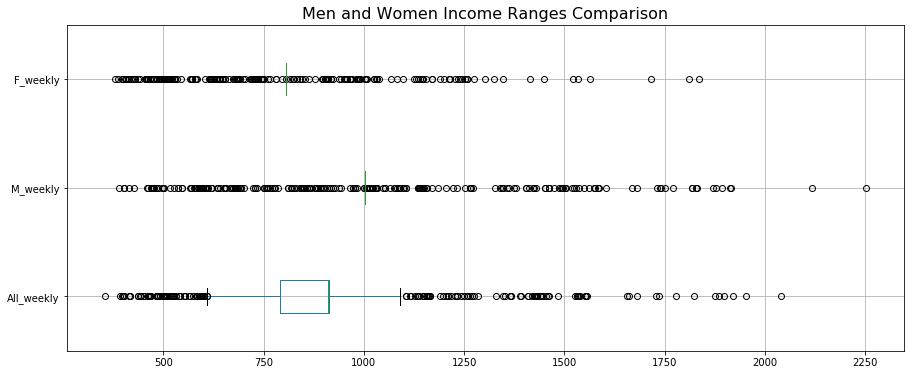

In [9]:
df.boxplot(column=["All_weekly", "M_weekly", "F_weekly"], vert=False, figsize=(15, 6))
plt.title('Men and Women Income Ranges Comparison', size=16)

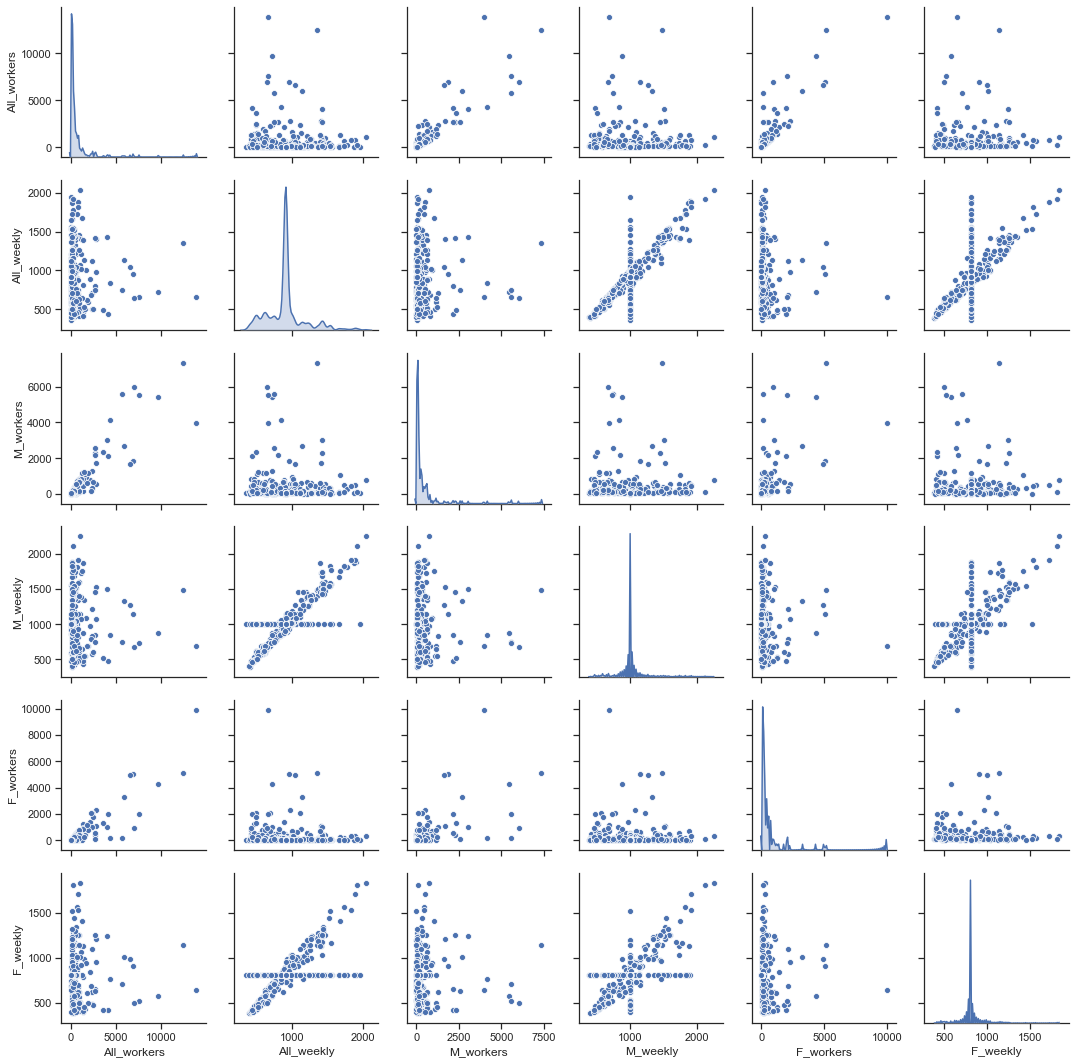

In [10]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, diag_kind="kde")

Text(0.5, 1.0, 'Most Popular Occupations among all Men and Women')

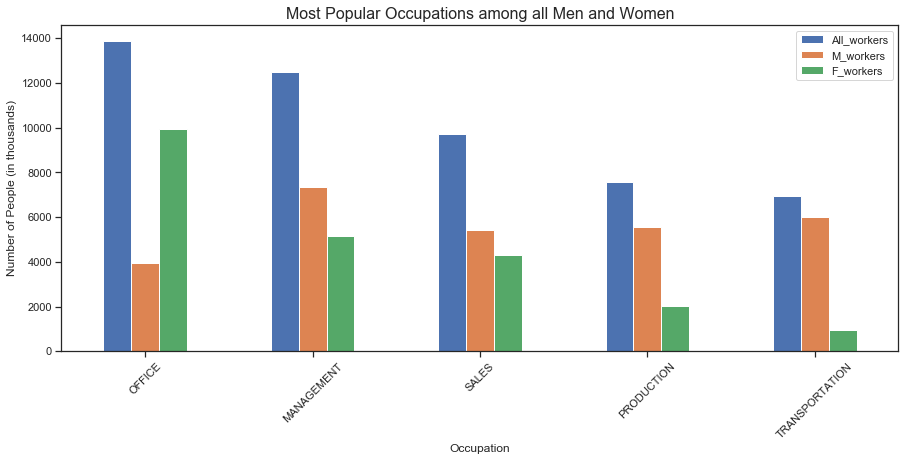

In [11]:
df_jobs = df[["Occupation","All_workers","M_workers","F_workers"]]
df_top10_jobs = df_jobs.sort_values(['All_workers'], ascending=False).head(5)
df_top10_jobs.plot(kind='bar', figsize=(15, 6), rot=45, x='Occupation') 
plt.ylabel("Number of People (in thousands)")
plt.title("Most Popular Occupations among all Men and Women", size=16)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0.98, 'Most and Least Popular Occupations')

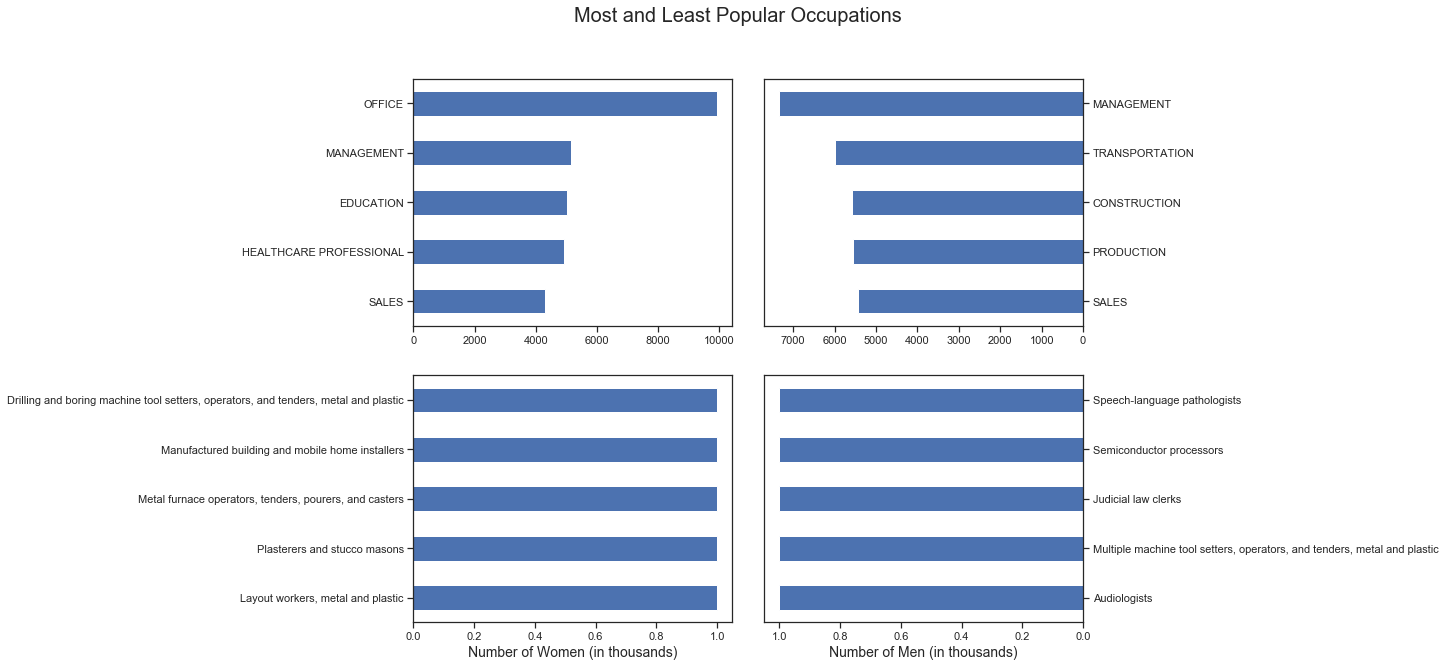

In [12]:
fig, axes = plt.subplots(2, 2)
figsize=(12, 10)

df_jobs_f = df[['Occupation','F_workers']].sort_values(['F_workers'], ascending=False)
df_jobs_f = df_jobs_f[df['F_workers'] > 0]
df_jobs_f.head(5).plot(kind='barh', figsize=figsize, x='Occupation', ax=axes[0,0])
df_jobs_f.tail(5).plot(kind='barh', figsize=figsize, x='Occupation', ax=axes[1,0])

df_jobs_m = df[['Occupation','M_workers']].sort_values(['M_workers'], ascending=False)
df_jobs_m = df_jobs_m[df['M_workers'] > 0]
df_jobs_m.head(5).plot(kind='barh', figsize=figsize, x='Occupation', ax=axes[0,1])
df_jobs_m.tail(5).plot(kind='barh', figsize=figsize, x='Occupation', ax=axes[1,1])


axes[0,0].invert_yaxis()
axes[0,0].get_legend().remove()
axes[0,0].yaxis.label.set_visible(False)

axes[1,0].get_legend().remove()
axes[1,0].yaxis.label.set_visible(False)
axes[1,0].set_xlabel('Number of Women (in thousands)', size=14)

axes[0,1].invert_xaxis()
axes[0,1].invert_yaxis() 
axes[0,1].tick_params(bottom=True, top=False, left=False, right=True)
axes[0,1].tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=True)
axes[0,1].get_legend().remove()
axes[0,1].yaxis.label.set_visible(False)

axes[1,1].invert_xaxis()
axes[1,1].invert_yaxis() 
axes[1,1].tick_params(bottom=True, top=False, left=False, right=True)
axes[1,1].tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=True)
axes[1,1].get_legend().remove()
axes[1,1].yaxis.label.set_visible(False)
axes[1,1].set_xlabel('Number of Men (in thousands)', size=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)
fig.suptitle('Most and Least Popular Occupations', size=20)

Text(0.5, 1.0, 'Occupations with Most Income')

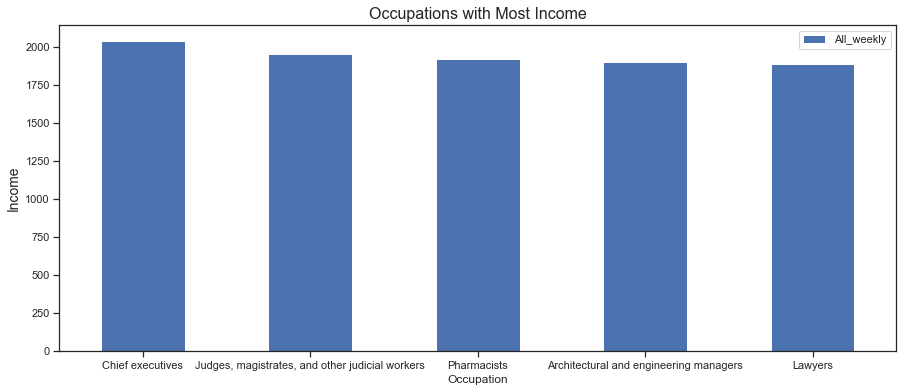

In [13]:
df_income = df[['Occupation', 'All_weekly']]
df_top5_income = df_income.sort_values(['All_weekly'], ascending=False).head(5)
df_top5_income.plot(kind='bar', figsize=(15, 6), rot=0, x='Occupation') 
plt.ylabel("Income", size=14)
plt.title("Occupations with Most Income", size=16)

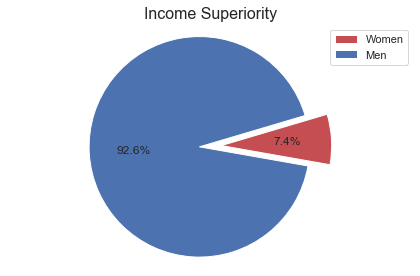

In [14]:
df_income_f = df[df["F_weekly"] > df["M_weekly"]].shape[0]
df_income_m = df[df["F_weekly"] < df["M_weekly"]].shape[0]

labels = ['Women', 'Men']
sizes = [df_income_f, df_income_m]
colors = ['r', 'b']
explode = (0, 0.2)

plt.pie(sizes, colors=colors, explode=explode, autopct='%1.1f%%', startangle=-10)
plt.legend(labels, loc="best")
plt.title('Income Superiority', size=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [15]:
df['weekly_diff'] = df['M_weekly'] - df['F_weekly']

print('Occupation with Highest Income for Men:')
df[df['weekly_diff'] == df['weekly_diff'].max()][['Occupation', 'M_weekly', 'F_weekly']]

Occupation with Highest Income for Men:


,Occupation,M_weekly,F_weekly
20,Architectural and engineering managers,1892.0,805.848168


In [16]:
print('Occupation with Highest Income for Women:')
df[df['weekly_diff'] == df['weekly_diff'].min()][['Occupation', 'M_weekly', 'F_weekly']]

Occupation with Highest Income for Women:


,Occupation,M_weekly,F_weekly
193,Nurse practitioners,1003.155844,1522.0


In [17]:
print('Occupation with Almost Equal Income for Men and Women:')
df[abs(df['weekly_diff']) == min(abs(df['weekly_diff']))][['Occupation', 'M_weekly', 'F_weekly']]

Occupation with Almost Equal Income for Men and Women:


,Occupation,M_weekly,F_weekly
304,"Bookkeeping, accounting, and auditing clerks",690.0,692.0


0.826243188848362

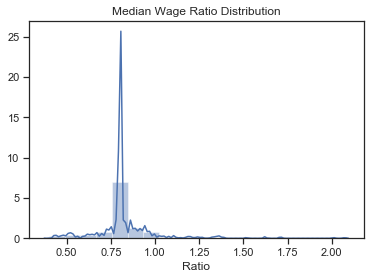

In [18]:
df['Ratio'] = df.F_weekly/df.M_weekly
sns.distplot(df.Ratio, bins = np.linspace(0.4,1.2,10))
plt.title('Median Wage Ratio Distribution')
np.mean(df.Ratio)